In [2]:
import numpy as np
np.random.seed(4917)
from keras.models import Model,load_model
from output.Test_Functions import log_progress
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline
#from test_environments import Environment1, Environment2, Environment3,Environment4,Environment5
from time import time
from Settings import *
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
#Environment={1:Environment1,2:Environment2,3:Environment3,4:Environment4,5:Environment5}
#Direction={1:'E',2:'E',3:'E',4:'E',5:'E'}
##### IMPORTANT SELECT WHICH ENVIRONMENT YOU WANT TO TEST FROM HERE
from Environments import CreateEnvironment
from skimage import io,transform

Using Theano backend.


In [3]:
from time import time
from Obstacles import Obstacles
from Foods import Foods
from Agent import Agent
from World import World
import matplotlib.pyplot as plt
from Settings import *
%matplotlib inline

In [3]:
Start = time.time()

#Add Pictures
Settings.SetBlockSize(200)
Settings.AddImage('Wall','Pics/wall.jpg')
Settings.AddImage('Food','Pics/food.jpg')

#Specify World Size
Settings.WorldSize=(11,11)

#Create Probabilities
obs = np.zeros(Settings.WorldSize)
ragnt = np.zeros(Settings.WorldSize)
gagnt = np.zeros(Settings.WorldSize)
food = np.zeros(Settings.WorldSize)
obs[3:8,5] = 1 
ragnt[:,0] =1
gagnt[:,10]=1
food[:,4:7]=1
food[3:8,5] = 0

#Add Probabilities to Settings
Settings.AddProbabilityDistribution('Obs',obs)
Settings.AddProbabilityDistribution('ragnt',ragnt)
Settings.AddProbabilityDistribution('gagnt',gagnt)
Settings.AddProbabilityDistribution('food',food)

#Create World Elements
obs = Obstacles('Wall',Shape=np.array([[1],[1],[1],[1]]),PdstName='Obs')
food = Foods('Food',PdstName='food')

ragnt = Agent(Fname='Pics/ragent.jpg',Power=3,VisionAngle=180,Range=-1,PdstName='ragnt',ActionMemory=0)
gagnt = Agent(Fname='Pics/gagent.jpg',VisionAngle=180,Range=-1,Power=10,ControlRange=1,PdstName='gagnt')
print(ragnt.ID,gagnt.ID)
game =World()
#Adding Agents in Order of Following the action
#game.AddAgents([ragnt])
game.AddAgents([gagnt,ragnt])
game.AddObstacles([obs])
game.AddFoods([food])
Start = time.time()-Start
print ('Taken:',Start)

1001 1002
Taken: 0.287386417388916


In [4]:
game.GenerateWorld()
game.Step()

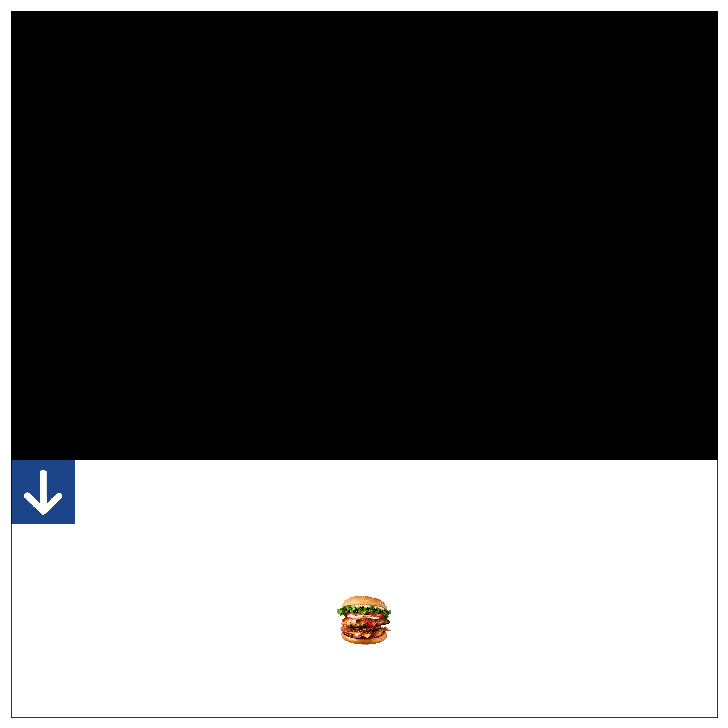

In [5]:
plt.figure(figsize=(13,13))
plt.imshow(game.AgentViewPoint(1001))
#plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig('sub.jpg')

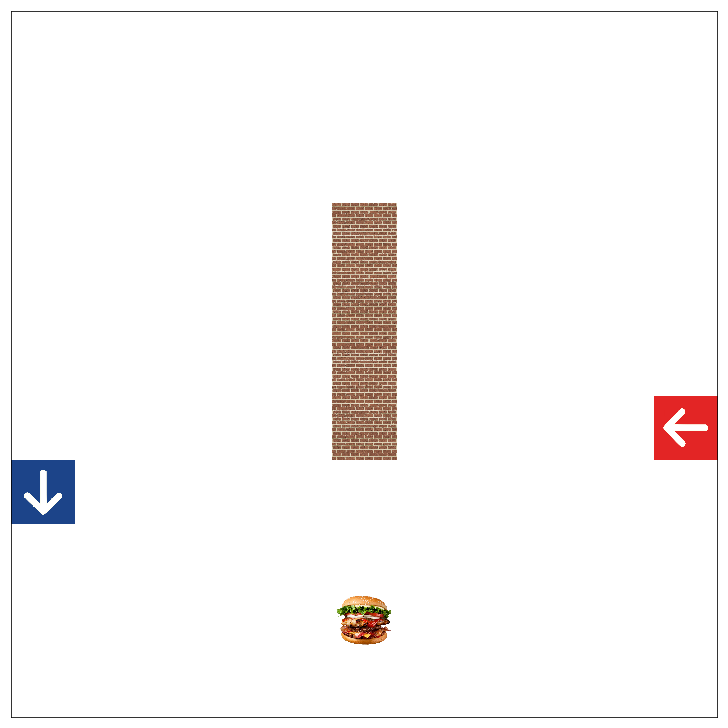

In [6]:
plt.figure(figsize=(13,13))
plt.imshow(game.BuildImage())
#plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.savefig('full map.jpg')

In [7]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
    13:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'}}
'''
    1:{'sub':(1,1),'dom':(1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    2:{'sub':(1,1),'dom':(7,4),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    3:{'sub':(1,1),'dom':(10,0),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    4:{'sub':(1,1),'dom':(9,9),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    5:{'sub':(1,1),'dom':(1,9),'food':(2,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' explore'},
    6:{'sub':(1,1),'dom':(1,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' analyze the results'},
    7:{'sub':(1,1),'dom':(3,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+' surprise me'},
    8:{'sub':(1,1),'dom':(9,7),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    9:{'sub':(1,1),'dom':(1,9),'food':(2,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]},
    10:{'sub':(1,1),'dom':(1,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]},
    11:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+' race'},
    12:{'sub':(1,1),'dom':(1,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'}
}
'''

"\n    1:{'sub':(1,1),'dom':(1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},\n    2:{'sub':(1,1),'dom':(7,4),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},\n    3:{'sub':(1,1),'dom':(10,0),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},\n    4:{'sub':(1,1),'dom':(9,9),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},\n    5:{'sub':(1,1),'dom':(1,9),'food':(2,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' explore'},\n    6:{'sub':(1,1),'dom':(1,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' analyze the results'},\n    7:{'sub':(1,1),'dom':(3,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+' surprise me'},\n    8:{'sub':(1,1),'dom':(9,7),'food':(2,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},\n    9:{'sub':(1,1),'dom':(1,9),'food':(2,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]},\n    10:{'sub':(1,1)

### Vision Range

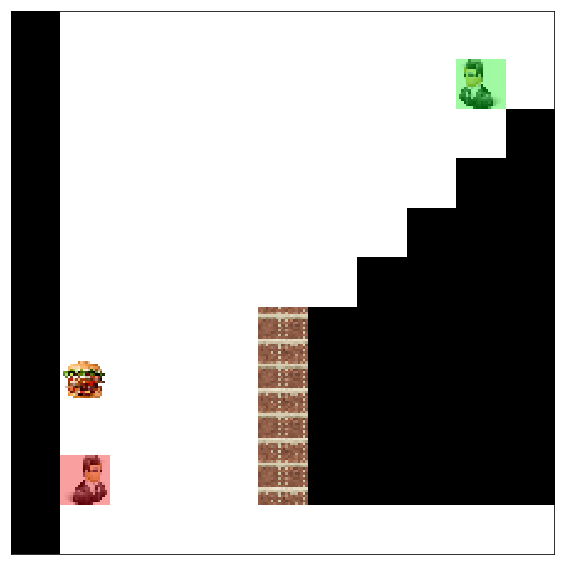

In [3]:
preferences={
    1:{'sub':(9,1),'dom':(1,9),'food':(7,1),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]}}
plt.figure(figsize=(15,10))
game = CreateEnvironment(preferences[1])
game.Step()
plt.imshow(game.AgentViewPoint(1001))
plt.xticks([])
plt.yticks([])
plt.savefig('vision-range-6.png',bbox_inches='tight',dpi='figure')

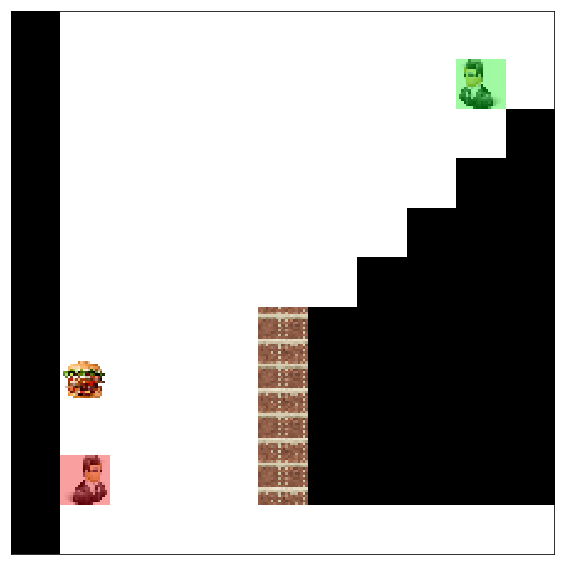

In [4]:
preferences={
    1:{'sub':(9,1),'dom':(1,9),'food':(7,1),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]}}
plt.figure(figsize=(15,10))
game = CreateEnvironment(preferences[1])
game.Step()
plt.imshow(game.AgentViewPoint(1001))
plt.xticks([])
plt.yticks([])
plt.savefig('vision-range-3.png',bbox_inches='tight',dpi='figure')

### Vision Angle

In [ ]:
preferences={
    1:{'sub':(9,1),'dom':(1,9),'food':(7,1),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]}}
plt.figure(figsize=(15,10))
game = CreateEnvironment(preferences[1])
game.Step()
plt.imshow(game.AgentViewPoint(1001))
plt.xticks([])
plt.yticks([])
plt.savefig('vision-angle-180.png',bbox_inches='tight',dpi='figure')

In [ ]:
preferences={
    1:{'sub':(9,1),'dom':(1,9),'food':(7,1),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]}}
plt.figure(figsize=(15,10))
game = CreateEnvironment(preferences[1])
#game.agents[1001].NextAction = Settings.PossibleActions[0]
game.Step()
plt.imshow(game.AgentViewPoint(1001))
plt.xticks([])
plt.yticks([])
plt.savefig('vision-angle-90.png',bbox_inches='tight',dpi='figure')

### agent move ego-centric

In [ ]:
preferences={
    1:{'sub':(9,1),'dom':(1,9),'food':(7,1),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]}}
plt.figure(figsize=(15,10))
game = CreateEnvironment(preferences[1])
for x in range(1,3):
    ax = plt.subplot(1,2,x)
    game.Step()
    ax.imshow(game.AgentViewPoint(1001))
    game.agents[1001].NextAction= Settings.PossibleActions[0]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.savefig('ego-move.png',bbox_inches='tight',dpi='figure')

### agent move altercentric

In [ ]:
preferences={
    1:{'sub':(9,1),'dom':(1,9),'food':(7,1),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]}}
plt.figure(figsize=(15,10))
game = CreateEnvironment(preferences[1])
for x in range(1,3):
    ax = plt.subplot(1,2,x)
    game.Step()
    ax.imshow(game.AgentViewPoint(1001))
    game.agents[1001].NextAction= Settings.PossibleActions[3]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.savefig('alter-move.png',bbox_inches='tight',dpi='figure')

### probability distribution example

In [ ]:
preferences={
    1:{'sub':(1,1),'dom':(1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    2:{'sub':(9,1),'dom':(1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    3:{'sub':(9,9),'dom':(1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]}}
plt.figure(figsize=(15,10))
for x in range(1,4):
    ax = plt.subplot(1,3,x)
    game = CreateEnvironment(preferences[x])
    ax.imshow(game.BuildImage())
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.savefig('prob-matrix.png',bbox_inches='tight',dpi='figure')


### agent block vision

In [ ]:
preferences={
    1:{'sub':(9,1),'dom':(1,9),'food':(7,1),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    2:{'sub':(9,9),'dom':(1,9),'food':(3,4),'obs':(3,5),'subdir':'N','domdir':'W','mesg':msg+msgs[0]}}
plt.figure(figsize=(15,10))
for x in range(1,3):
    ax = plt.subplot(1,2,x)
    game = CreateEnvironment(preferences[x])
    game.Step()
    ax.imshow(game.AgentViewPoint(1001))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.savefig('vision_block.png',bbox_inches='tight',dpi='figure')

### draw image for sample environment, Network input


preferences={
1:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
2:{'sub':(2,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
3:{'sub':(2,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
4:{'sub':(2,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
5:{'sub':(2,1),'dom':(2,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' explore'},
6:{'sub':(2,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' analyze the results'},
7:{'sub':(2,1),'dom':(4,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+' surprise me'},
8:{'sub':(2,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
9:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]},
10:{'sub':(2,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]},
11:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+' race'},
12:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+' SM'},
13:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'}
        }

In [3]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
#Group 1 (Dominant positions) Original
1:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
2:{'sub':(2,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
3:{'sub':(2,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
4:{'sub':(2,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
8:{'sub':(2,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-1 shifting all elements.
101:{'sub':(2+1,1),'dom':(2+1,9),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
102:{'sub':(2+1,1),'dom':(7+1,4),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
103:{'sub':(2-1,1),'dom':(10-1,0),'food':(3-1,4),'obs':(3+1,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
104:{'sub':(2+1,1),'dom':(9+1,9),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
108:{'sub':(2+1,1),'dom':(9+1,7),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-2 shifting only dominant when is observable.
201:{'sub':(2,1),'dom':(2+1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
202:{'sub':(2,1),'dom':(7+1,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
203:{'sub':(2,1),'dom':(10-1,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
204:{'sub':(2,1),'dom':(9+1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
208:{'sub':(2,1),'dom':(9+1,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-3 shifting subordinate only.
301:{'sub':(2+1,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
302:{'sub':(2+1,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
303:{'sub':(2+1,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
304:{'sub':(2+1,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
308:{'sub':(2+1,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-4 shifting only food.
401:{'sub':(2,1),'dom':(2,9),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
402:{'sub':(2,1),'dom':(7,4),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
403:{'sub':(2,1),'dom':(10,0),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
404:{'sub':(2,1),'dom':(9,9),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
408:{'sub':(2,1),'dom':(7,7),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 2 Food, Obstacle Positions.
5:{'sub':(2,1),'dom':(2,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
6:{'sub':(2,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
9:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
10:{'sub':(2,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
16:{'sub':(2,1),'dom':(2,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-1 shifting all elements.
105:{'sub':(2+1,1),'dom':(2+1,9),'food':(3+1,6),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
106:{'sub':(2+1,1),'dom':(2+1,9),'food':(6+1,5),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
109:{'sub':(2+1,1),'dom':(2+1,9),'food':(3+1,4),'obs':(7+1,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
110:{'sub':(2+1,1),'dom':(2+1,9),'food':(7+1,4),'obs':(7+1,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
116:{'sub':(2+1,1),'dom':(2+1,9),'food':(1+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-2 shifting only dominant when is observable.
205:{'sub':(2,1),'dom':(2+1,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
206:{'sub':(2,1),'dom':(2+1,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
209:{'sub':(2,1),'dom':(2+1,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
210:{'sub':(2,1),'dom':(2+1,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
216:{'sub':(2,1),'dom':(2+1,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-3 shifting subordinate only.
305:{'sub':(2+1,1),'dom':(2,9),'food':(3,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
306:{'sub':(2+1,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
309:{'sub':(2+1,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
310:{'sub':(2+1,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
316:{'sub':(2+1,1),'dom':(2,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-4 shifting only food.
405:{'sub':(2,1),'dom':(2,9),'food':(3+1,6),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
406:{'sub':(2,1),'dom':(2,9),'food':(6+1,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
409:{'sub':(2,1),'dom':(2,9),'food':(3+1,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
410:{'sub':(2,1),'dom':(2,9),'food':(7+1,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
416:{'sub':(2,1),'dom':(2,9),'food':(1+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},   
#Group 3 not in Training Examples.
17:{'sub':(2,1),'dom':(4,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_avoid'},
11:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
12:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_eat'},
13:{'sub':(2,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
14:{'sub':(3,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
15:{'sub':(3,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
#Group 3-1 shifting all elements.
117:{'sub':(2+1,1),'dom':(4+1,1),'food':(6+1,5),'obs':(3+1,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_avoid'},
111:{'sub':(9+1,1),'dom':(7+1,1),'food':(8+1,10),'obs':(3+1,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
112:{'sub':(2+1,1),'dom':(2+1,9),'food':(1+1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_eat'},
113:{'sub':(2+1,1),'dom':(2+1,9),'food':(1+1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
114:{'sub':(3+1,1),'dom':(3+1,9),'food':(2+1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
115:{'sub':(3+1,1),'dom':(3+1,9),'food':(2+1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
#Group 3-2 shifting only dominant when is observable.
217:{'sub':(2,1),'dom':(4+1,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_avoid'},
211:{'sub':(9,1),'dom':(7+1,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
212:{'sub':(2,1),'dom':(2+1,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_eat'},
213:{'sub':(2,1),'dom':(2+1,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
214:{'sub':(3,1),'dom':(3+1,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
215:{'sub':(3,1),'dom':(3+1,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
#Group 3-3 shifting subordinate only.
317:{'sub':(2+1,1),'dom':(4,1),'food':(6,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_avoid'},
311:{'sub':(9+1,1),'dom':(7,1),'food':(8,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
312:{'sub':(2+1,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_eat'},
313:{'sub':(2+1,1),'dom':(2,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
314:{'sub':(3+1,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
315:{'sub':(3+1,1),'dom':(3,9),'food':(2,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
#Group 3-4 shifting only food.
417:{'sub':(2,1),'dom':(4,1),'food':(6+1,5),'obs':(3,5),'subdir':'W','domdir':'W','mesg':msg+msgs[0]+'_N_avoid'},
411:{'sub':(9,1),'dom':(7,1),'food':(8+1,10),'obs':(3,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]+'_N_avoid'},
412:{'sub':(2,1),'dom':(2,9),'food':(1+1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_eat'},
413:{'sub':(2,1),'dom':(2,9),'food':(1+1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
414:{'sub':(3,1),'dom':(3,9),'food':(2+1,5),'obs':(0,0),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_N_avoid'},
415:{'sub':(3,1),'dom':(3,9),'food':(2+1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_N_avoid'},
    
# Added Later
18:{'sub':(2,1),'dom':(10,5),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
19:{'sub':(2,1),'dom':(8,6),'food':(4,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},


#Group 1-1 shifting all elements.
118:{'sub':(2+1,1),'dom':(10-1,5),'food':(3-1,4),'obs':(3-1,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
119:{'sub':(2+1,1),'dom':(8+1,6),'food':(4+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},

    
#Group 1-2 shifting only dominant when is observable.
218:{'sub':(2,1),'dom':(10-1,5),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
219:{'sub':(2,1),'dom':(8+1,6),'food':(4,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},
    
#Group 1-3 shifting subordinate only.
318:{'sub':(2+1,1),'dom':(10,5),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
319:{'sub':(2+1,1),'dom':(8,6),'food':(4,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},
    
#Group 1-4 shifting only food.
418:{'sub':(2,1),'dom':(10,5),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
419:{'sub':(2,1),'dom':(8,6),'food':(4+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_N_eat'},
        }

# The Last Cases

In [4]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
#Group 1 (Dominant positions) Original
1:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
2:{'sub':(2,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
3:{'sub':(2,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
4:{'sub':(2,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
5:{'sub':(2,1),'dom':(10,5),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
6:{'sub':(2,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},

#Group 1-1 shifting all elements.
101:{'sub':(2+1,1),'dom':(2+1,9),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
102:{'sub':(2+1,1),'dom':(7+1,4),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
103:{'sub':(2-1,1),'dom':(10-1,0),'food':(3-1,4),'obs':(3+1,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
104:{'sub':(2+1,1),'dom':(9+1,9),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
105:{'sub':(2+1,1),'dom':(10-1,5),'food':(3-1,4),'obs':(3-1,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
106:{'sub':(2+1,1),'dom':(9+1,7),'food':(3+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-2 shifting only dominant when is observable.
201:{'sub':(2,1),'dom':(2+1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
202:{'sub':(2,1),'dom':(7+1,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
203:{'sub':(2,1),'dom':(10-1,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
204:{'sub':(2,1),'dom':(9+1,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
205:{'sub':(2,1),'dom':(10-1,5),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
206:{'sub':(2,1),'dom':(9+1,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-3 shifting subordinate only.
301:{'sub':(2+1,1),'dom':(2,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
302:{'sub':(2+1,1),'dom':(7,4),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
303:{'sub':(2+1,1),'dom':(10,0),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
304:{'sub':(2+1,1),'dom':(9,9),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
305:{'sub':(2+1,1),'dom':(10,5),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
306:{'sub':(2+1,1),'dom':(9,7),'food':(3,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 1-4 shifting only food.
401:{'sub':(2,1),'dom':(2,9),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
402:{'sub':(2,1),'dom':(7,4),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]+'_avoid'},
403:{'sub':(2,1),'dom':(10,0),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
404:{'sub':(2,1),'dom':(9,9),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
405:{'sub':(2,1),'dom':(10,5),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'N','mesg':msg+msgs[0]+'_N_eat'},
406:{'sub':(2,1),'dom':(7,7),'food':(3+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
    
#Group 2 Food, Obstacle Positions.

7:{'sub':(2,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
8:{'sub':(2,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
9:{'sub':(2,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
10:{'sub':(2,1),'dom':(2,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-1 shifting all elements.

107:{'sub':(2+1,1),'dom':(2+1,9),'food':(6+1,5),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
108:{'sub':(2+1,1),'dom':(2+1,9),'food':(3+1,4),'obs':(7+1,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
109:{'sub':(2+1,1),'dom':(2+1,9),'food':(7+1,4),'obs':(7+1,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
110:{'sub':(2+1,1),'dom':(2+1,9),'food':(1+1,4),'obs':(3+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-2 shifting only dominant when is observable.

207:{'sub':(2,1),'dom':(2+1,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
208:{'sub':(2,1),'dom':(2+1,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
209:{'sub':(2,1),'dom':(2+1,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
210:{'sub':(2,1),'dom':(2+1,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-3 shifting subordinate only.

307:{'sub':(2+1,1),'dom':(2,9),'food':(6,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
308:{'sub':(2+1,1),'dom':(2,9),'food':(3,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
309:{'sub':(2+1,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
310:{'sub':(2+1,1),'dom':(2,9),'food':(1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-4 shifting only food.

407:{'sub':(2,1),'dom':(2,9),'food':(6+1,5),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+'_avoid'},
408:{'sub':(2,1),'dom':(2,9),'food':(3+1,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
409:{'sub':(2,1),'dom':(2,9),'food':(7+1,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
410:{'sub':(2,1),'dom':(2,9),'food':(1+1,4),'obs':(3,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'}
}

In [76]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
11:{'sub':(5,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
12:{'sub':(5,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
13:{'sub':(5,1),'dom':(2,6),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-1 shifting all elements.
111:{'sub':(5+1,1),'dom':(2+1,9),'food':(7+1,4),'obs':(7+1,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
112:{'sub':(5+1,1),'dom':(2+1,9),'food':(7+1,4),'obs':(7+1,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-2 shifting only dominant when is observable.
211:{'sub':(5,1),'dom':(2+1,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
212:{'sub':(5,1),'dom':(2+1,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-3 shifting subordinate only.
311:{'sub':(5+1,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
312:{'sub':(5+1,1),'dom':(2,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
#Group 2-4 shifting only food.
411:{'sub':(5,1),'dom':(2,9),'food':(7+1,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]+'_eat'},
412:{'sub':(5,1),'dom':(2,9),'food':(7+1,4),'obs':(7,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]+'_eat'},
}

In [77]:
arrow = io.imread('imgs/envs/arrow.jpg')
right = transform.resize(arrow,(100,100),mode='constant')
right[right<0.5]=0
right[right>0.5]=1
down = transform.rotate(right,-90)
up = transform.rotate(right,90)
left = transform.rotate(right,180)
img={0:left,1:down,2:right,3:up}

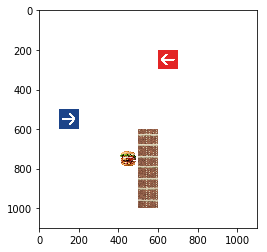

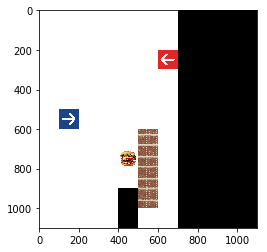

In [78]:
path={1:[(300,300,2),(300,400,2),(300,500,1)],
      #2:[(300,300,2),(300,400,2),(300,500,3),(200,500,3),(200,600,2),(200,600,0)]
      3:[(300,300,2),(300,400,2),(300,500,1)],
      4:[(300,300,2),(300,400,2),(300,500,1)],
      6:[(300,300,2),(300,400,2),(300,500,1)],
      8:[(300,300,2),(300,400,2),(300,500,1)],
      9:[(300,300,2),(300,400,2),(300,500,1),(400,500,1),(500,500,1),(600,500,1),(700,500,1)],
      10:[(300,300,2),(300,400,2),(300,500,3)],
      11:[(600,300,2),(600,400,2),(600,500,1),(700,500,1)],
      12:[(600,300,2),(600,400,2),(600,500,1),(700,500,1)]
     }
K=13
game = CreateEnvironment(preferences[K])
game.Step()
game_map = game.BuildImage()
#for loc in path[K]:
#    print(loc)
#    game_map[loc[0]-100:loc[0],loc[1]-100:loc[1]]*=img[loc[2]]
plt.imshow(game_map)
plt.figure()
plt.imshow(game.AgentViewPoint(1002))

In [5]:
Settings.BlockSize

(100, 100)

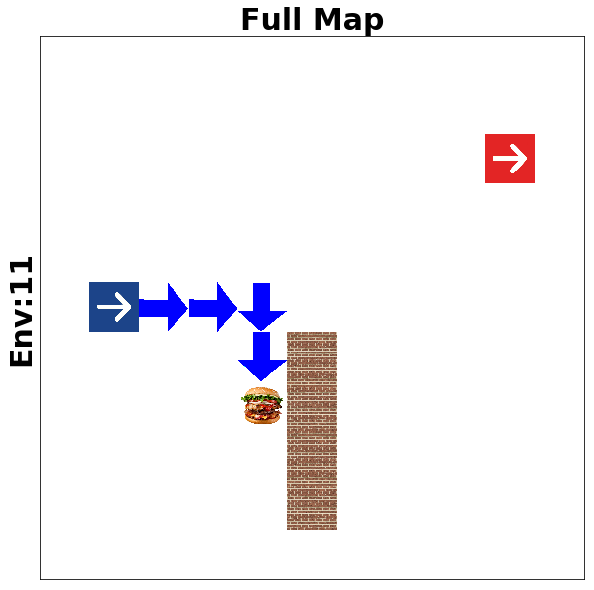

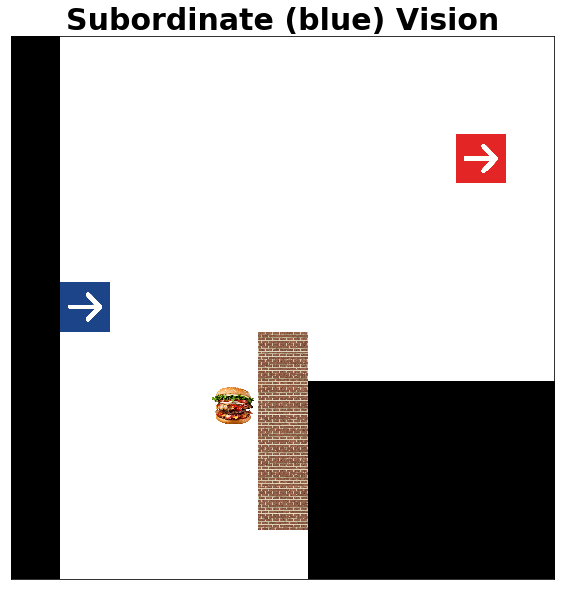

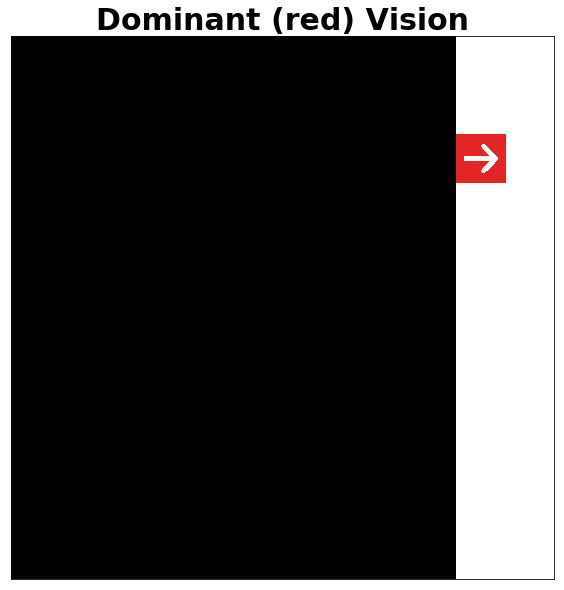

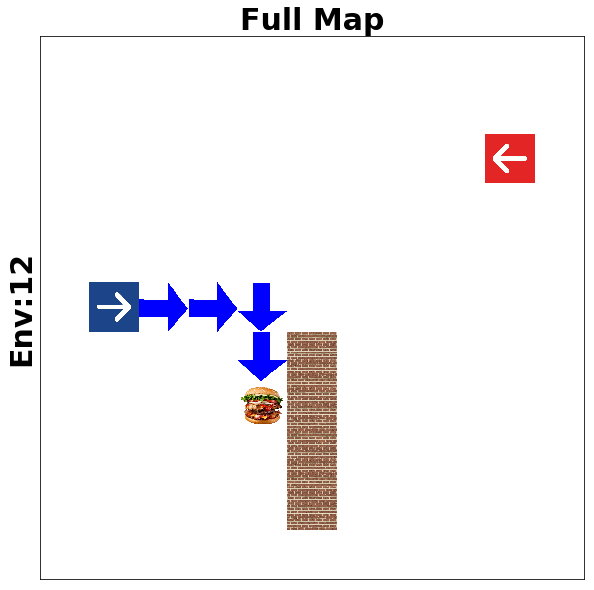

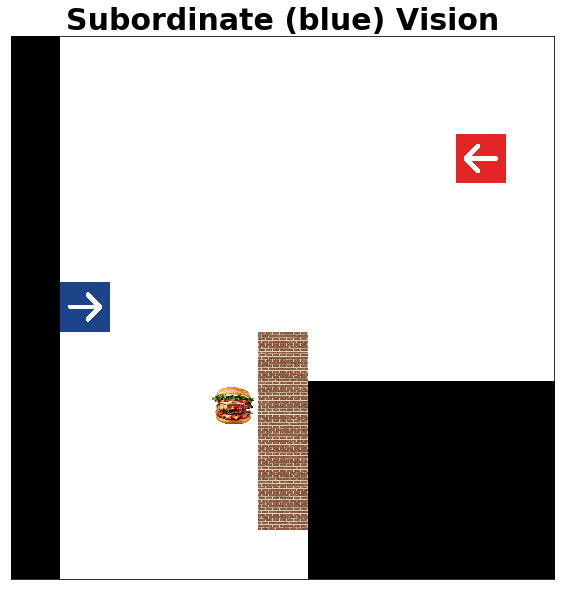

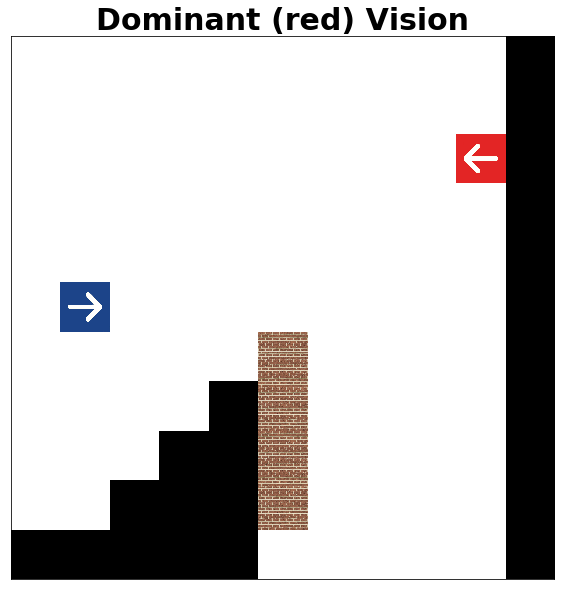

In [75]:
for K in [11,12]:
    plt.figure(figsize=(10,10))
    game = CreateEnvironment(preferences[K])
    game.Step()

    game_map = game.BuildImage()
    if K in path.keys():
        for loc in path[K]:
            game_map[loc[0]-100:loc[0],loc[1]-100:loc[1]]*=img[loc[2]]
    plt.imshow(game_map)#AgentViewPoint(1001))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('Env:{}'.format(K),weight='bold',fontsize=30)
    plt.title('Full Map',weight='bold',fontsize=30)
    plt.savefig('imgs/envs/ENV:{}_FM.png'.format(K),bbox_inches='tight',dpi='figure')

    plt.figure(figsize=(10,10))
    plt.imshow(game.AgentViewPoint(1001))
    plt.xticks([])
    plt.yticks([])
    plt.title('Subordinate (blue) Vision',weight='bold',fontsize=30)
    plt.savefig('imgs/envs/ENV:{}_AI.png'.format(K),bbox_inches='tight',dpi='figure')

    plt.figure(figsize=(10,10))
    plt.imshow(game.AgentViewPoint(1002))
    plt.xticks([])
    plt.yticks([])
    plt.title('Dominant (red) Vision',weight='bold',fontsize=30)
    plt.savefig('imgs/envs/ENV:{}_DM.png'.format(K),bbox_inches='tight',dpi='figure')

In [50]:
plt.figure(figsize=(10,10))
K=12
game = CreateEnvironment(preferences[K])
game.Step()

plt.imshow(game.BuildImage())#AgentViewPoint(1001))
plt.xticks([])
plt.yticks([])
plt.ylabel('Env:{}'.format(K),weight='bold',fontsize=15)
plt.title('Full Map',weight='bold',fontsize=20)
plt.savefig('imgs/ENV:{}_FM.png'.format(K),bbox_inches='tight',dpi='figure')

plt.figure(figsize=(10,10))
plt.imshow(game.AgentViewPoint(1001))
plt.xticks([])
plt.yticks([])
plt.title('Subordinate (Red) Vision',weight='bold',fontsize=20)
plt.savefig('imgs/ENV:{}_AI.png'.format(K),bbox_inches='tight',dpi='figure')

plt.figure(figsize=(10,10))
plt.imshow(game.AgentViewPoint(1002))
plt.xticks([])
plt.yticks([])
plt.title('Dominant (Green) Vision',weight='bold',fontsize=20)
plt.savefig('imgs/ENV:{}_DM.png'.format(K),bbox_inches='tight',dpi='figure')

KeyError: 12

In [4]:
names=['Observed', 'My position', 'Obstacles', 'Food', 'Oponent position']
keys = ['observed', 'mypos', 'obstacles', 'food', 'agentpos1002']
for k in range(5):
    array = game.agents[1001].NNFeed[keys[k]]
    array = np.array(array,dtype=int)
    array[array==0]=-1
    array[array==1]=0
    plt.figure(figsize=(10,10))
    totalrows=[]                                                                                                                                                        
    for row in range(array.shape[0]):                                                                                                                                   
        cells=[]                                                                                                                                                        
        for column in range(array.shape[1]):                                                                                                                            
            cells.append(game.GetElementImage(array[row,column]))                                                                                                       
        totalrows.append(np.concatenate(cells,axis=1))                                                                                                                  
    img = np.concatenate(totalrows,axis=0)
    plt.imshow(np.array(img,dtype=np.byte))
    plt.xticks([])
    plt.yticks([])
    plt.title(names[k],weight='bold',fontsize=20)
    plt.savefig('net-input-{}.png'.format(keys[k]),bbox_inches='tight',dpi='figure')

NameError: name 'game' is not defined